In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
import statsmodels.api as sm
from tqdm import tqdm

print("Imported Successfully !!")

Imported Successfully !!


### Read Data

In [2]:
df = pd.read_excel("Sample Data.xlsx")
df.head()

,Country,Year,Quarter,Month,State,City,Company,Brand,Channel,Units
0,India,2020,2020Q2,2020-06,Assam,Guwahati,Apple,Apple,Offline,343.75
1,India,2020,2020Q2,2020-06,Assam,Guwahati,Apple,Apple,Online,276.25
2,India,2020,2020Q2,2020-06,Assam,Guwahati,HMD,Nokia,Offline,316.25
3,India,2020,2020Q2,2020-06,Assam,Guwahati,HMD,Nokia,Online,40.00
4,India,2020,2020Q2,2020-06,Assam,Guwahati,Honor,Honor,Online,121.25


In [3]:
df.sort_values('Month',inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3118 entries, 959 to 0
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  3118 non-null   object 
 1   Year     3118 non-null   int64  
 2   Quarter  3118 non-null   object 
 3   Month    3118 non-null   object 
 4   State    3118 non-null   object 
 5   City     3118 non-null   object 
 6   Company  3118 non-null   object 
 7   Brand    3118 non-null   object 
 8   Channel  3118 non-null   object 
 9   Units    3118 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 268.0+ KB


### Understanding Data

##### Generating Value Counts for Overview of Categories

In [6]:
for i in df.columns:
    print(df[i].value_counts())
    print("*"*50)
    print()

India    3118
Name: Country, dtype: int64
**************************************************

2020    3118
Name: Year, dtype: int64
**************************************************

2020Q1    1919
2020Q2    1199
Name: Quarter, dtype: int64
**************************************************

2020-02    653
2020-01    634
2020-03    632
2020-06    603
2020-05    596
Name: Month, dtype: int64
**************************************************

Maharashtra       319
Tamil Nadu        310
Gujarat           308
Madhya Pradesh    306
Delhi             162
Karnataka         161
West Bengal       161
Telangana         158
Rajasthan         158
Punjab            157
Haryana           154
Chandigarh        154
Assam             154
Uttar Pradesh     153
Odisha            152
Bihar             151
Name: State, dtype: int64
**************************************************

Mumbai         162
New Delhi      162
Bengaluru      161
Kolkata        161
Chennai        159
Jaipur         158
Hyderabad

##### City vs Units - Which city overall sold highest units ?

<AxesSubplot:xlabel='City'>

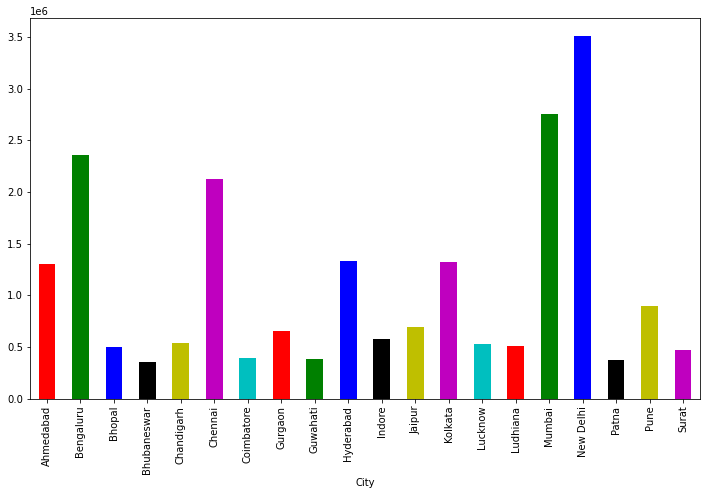

In [7]:
plt.figure(figsize=(12,7))
df.groupby('City')['Units'].sum().plot(kind='bar',color=list('rgbkymc'))

##### Brand vs Units - Which brand overall sold highest units ?

<AxesSubplot:xlabel='Brand'>

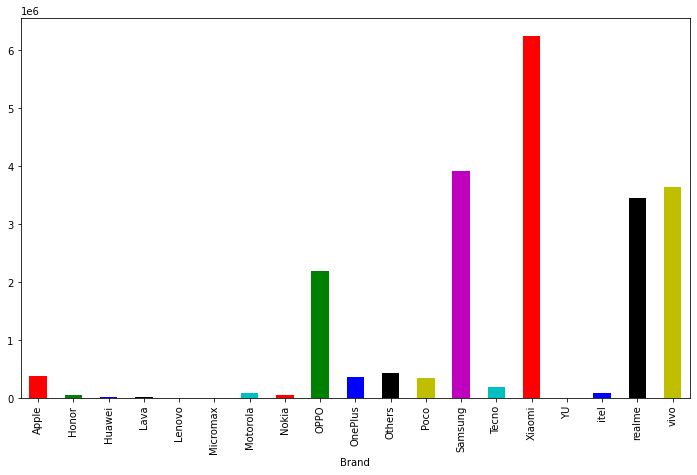

In [8]:
plt.figure(figsize=(12,7))
df.groupby('Brand')['Units'].sum().plot(kind='bar',color=list('rgbkymc'))

##### Monthly Channel-wise distribution

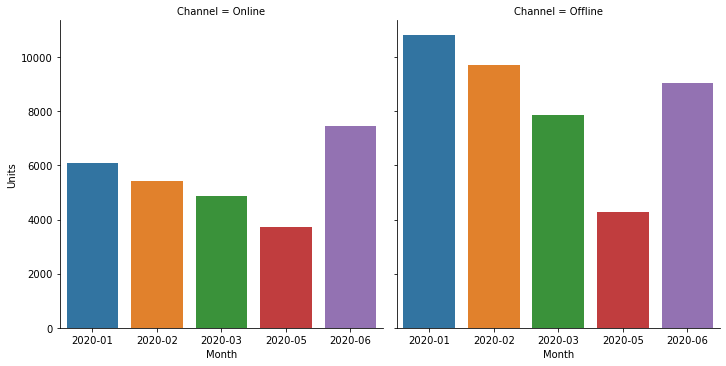

In [9]:
g = sns.catplot(x="Month", y="Units", 
                col="Channel", order=['2020-01','2020-02','2020-03','2020-05','2020-06'],
                data=df, kind="bar", ci=None);

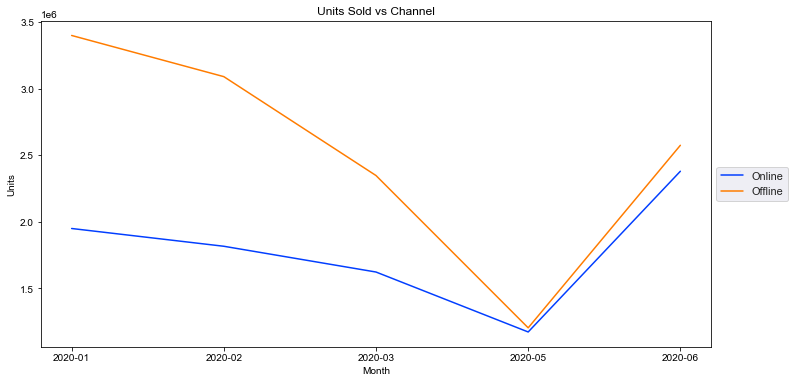

In [10]:
### Replicating same using Lineplot for better understanding

plt.figure(figsize=(12,6))
plt.title("Units Sold vs Channel")
sns.set(style="darkgrid")
g = sns.lineplot(data=df, x='Month', y='Units', hue='Channel', estimator='sum',palette='bright', ci=None)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))

##### Brandwise monthly distribution

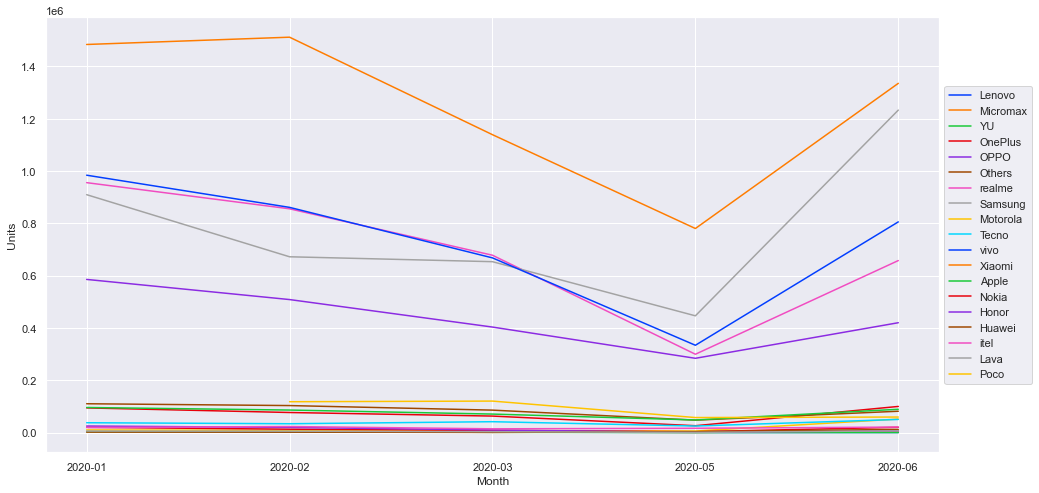

In [11]:
plt.figure(figsize=(16,8))
sns.set(style="darkgrid")
g = sns.lineplot(data=df, x='Month', y='Units', hue='Brand', estimator='sum',palette='bright', ci=None)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))

##### City-wise monthly distribution

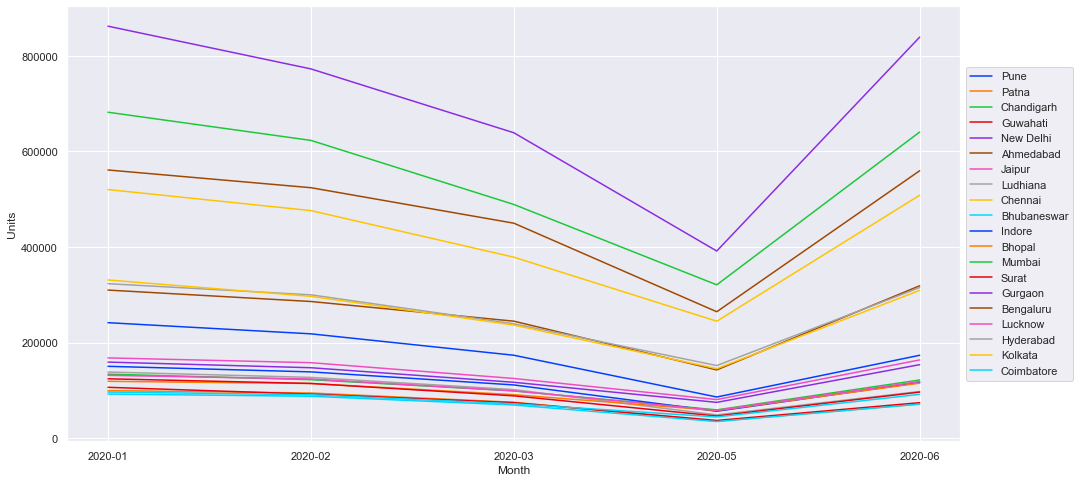

In [12]:
plt.figure(figsize=(16,8))
sns.set(style="darkgrid")
g = sns.lineplot(data=df, x='Month', y='Units', hue='City', estimator='sum',palette='bright', ci=None)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [16]:
print("Number of Unique Cities:",len(df['City'].unique()))
print("Number of Brands:",len(df['Brand'].unique()))

Number of Unique Cities: 20
Number of Brands: 19


##### New-Delhi : Brandwise-monthly distribution

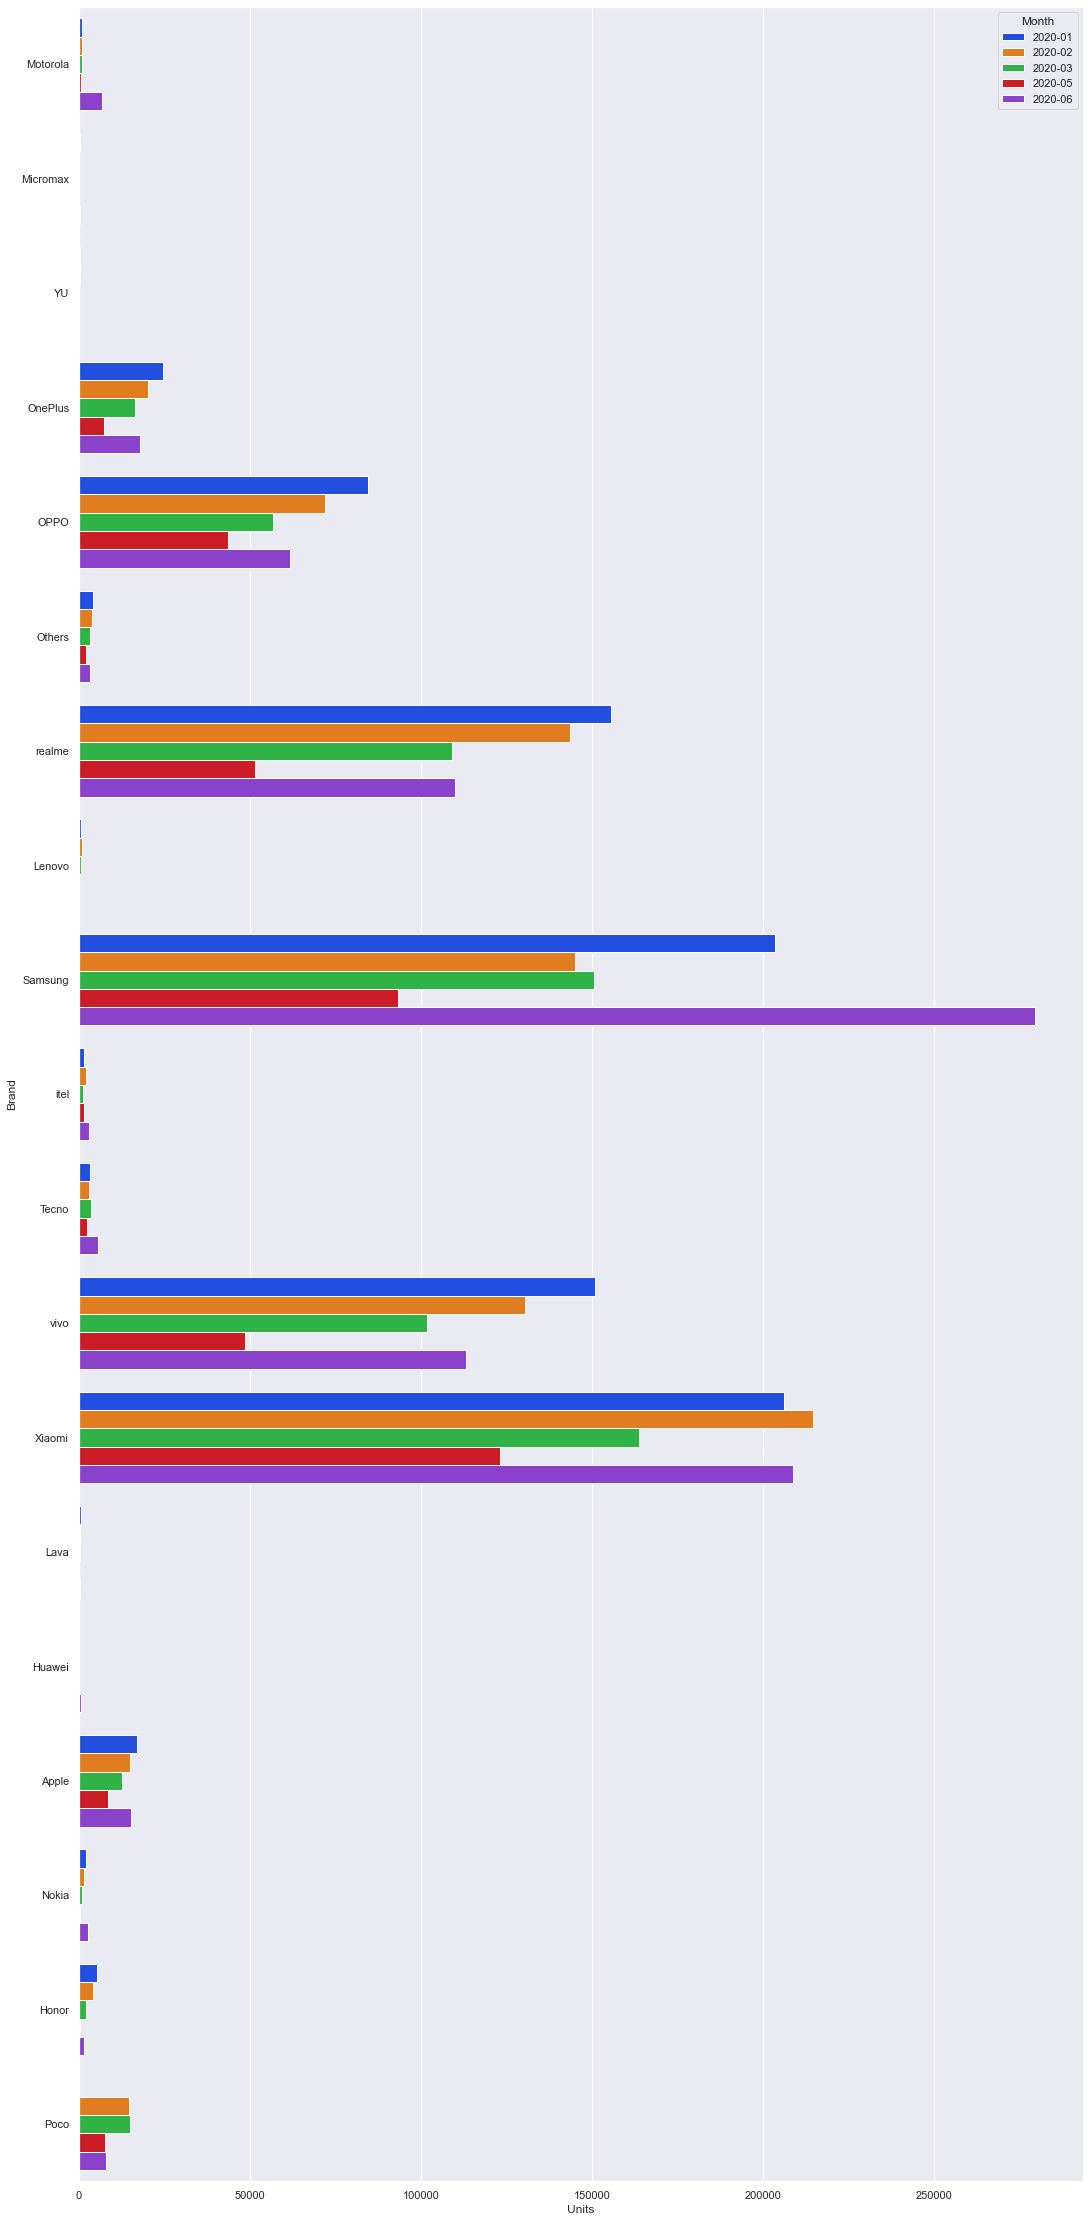

In [17]:
plt.figure(figsize=(18,40))
sns.set(style="darkgrid")
sns.barplot(data=df.query("City == 'New Delhi'"), y='Brand', x='Units', hue='Month', estimator=sum, ci=None, palette='bright')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#####  Micromax, Huwai, Lava, Lenovo etc.. has very low sale, not visible above, lets try other way for some

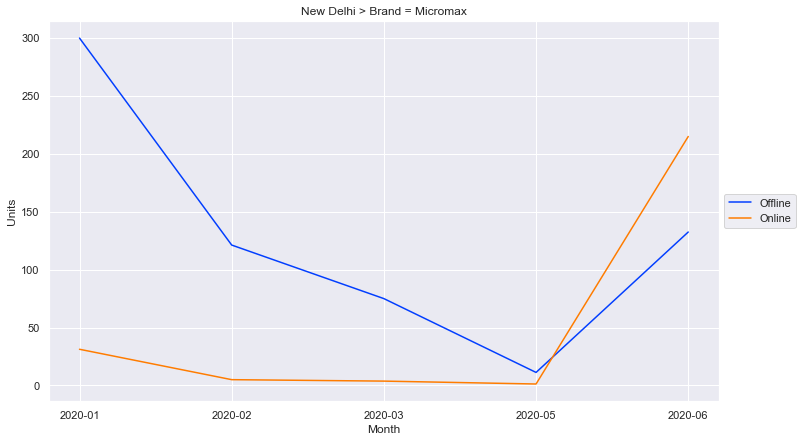

In [18]:
plt.figure(figsize=(12,7))
plt.title("New Delhi > Brand = Micromax")
sns.set(style="darkgrid")
g = sns.lineplot(data=df.query("City == 'New Delhi' & Brand == 'Micromax'"), x='Month', y='Units', hue='Channel', estimator='sum',palette='bright', ci=None)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))

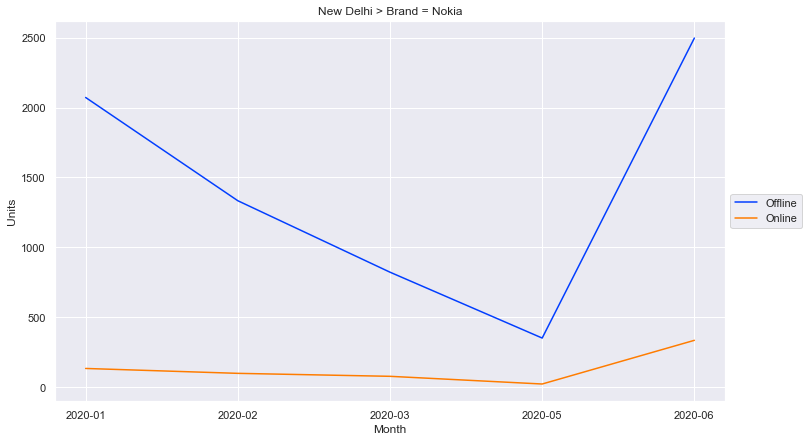

In [19]:
plt.figure(figsize=(12,7))
plt.title("New Delhi > Brand = Nokia")
sns.set(style="darkgrid")
g = sns.lineplot(data=df.query("City == 'New Delhi' & Brand == 'Nokia'"), x='Month', y='Units', hue='Channel', estimator='sum',palette='bright', ci=None)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))

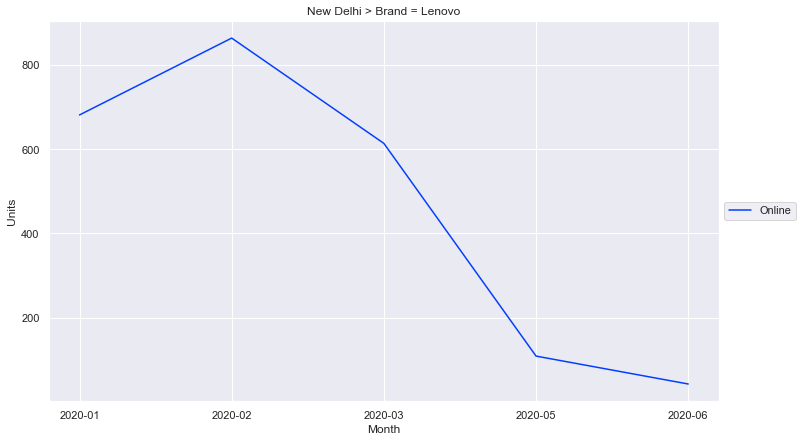

In [20]:
plt.figure(figsize=(12,7))
plt.title("New Delhi > Brand = Lenovo")
sns.set(style="darkgrid")
g = sns.lineplot(data=df.query("City == 'New Delhi' & Brand == 'Lenovo'"), x='Month', y='Units', hue='Channel', estimator='sum',palette='bright', ci=None)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### Data Pre-processing

#### Encoding Categorical Variables

In [21]:
def pre_process(data):
    data['Month'] = pd.to_datetime(df['Month'])
    City = pd.get_dummies(data['City'],prefix="City")
    Brand = pd.get_dummies(data['Brand'],prefix="Brand")
    Channel = pd.get_dummies(data['Channel'],prefix="Channel")
    data = data.drop(['Country','Year','Quarter','State','Company'],axis=1)
    data = pd.concat([City,Brand,Channel,data],axis=1)
    data.index = data.Month
    data = data.drop(['City','Brand','Channel','Month'],axis=1)
    data.head()
    return(data)

In [24]:
new_df = pre_process(df)
new_df.tail()

,City_Ahmedabad,City_Bengaluru,City_Bhopal,City_Bhubaneswar,City_Chandigarh,City_Chennai,City_Coimbatore,City_Gurgaon,City_Guwahati,City_Hyderabad,...,Brand_Samsung,Brand_Tecno,Brand_Xiaomi,Brand_YU,Brand_itel,Brand_realme,Brand_vivo,Channel_Offline,Channel_Online,Units
Month,,,,,,,,,,,,,,,,,,,,,
2020-06-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.25
2020-06-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.25
2020-06-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,86.25
2020-06-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,56.25
2020-06-01,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,343.75


##### Lets move ahead with City = 'New Delhi'  first

In [26]:
df_ND = new_df[new_df['City_New Delhi'] == 1]
df_ND.tail()

,City_Ahmedabad,City_Bengaluru,City_Bhopal,City_Bhubaneswar,City_Chandigarh,City_Chennai,City_Coimbatore,City_Gurgaon,City_Guwahati,City_Hyderabad,...,Brand_Samsung,Brand_Tecno,Brand_Xiaomi,Brand_YU,Brand_itel,Brand_realme,Brand_vivo,Channel_Offline,Channel_Online,Units
Month,,,,,,,,,,,,,,,,,,,,,
2020-06-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6876.25
2020-06-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,16.25
2020-06-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,42.50
2020-06-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,410.00
2020-06-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1405.00


In [40]:
df_ND.shape

(162, 42)

##### Not undertanding it, seems it is beacuse data is filtered on various factors - brands, channel, city etc... and repeating for same period

<AxesSubplot:xlabel='Month'>

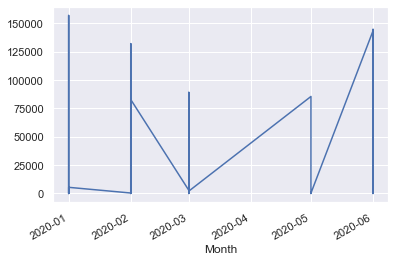

In [29]:
##### Plotting the series

df_ND.Units.plot() #not getting N pattern b/w Feb & Mar

<AxesSubplot:xlabel='Month'>

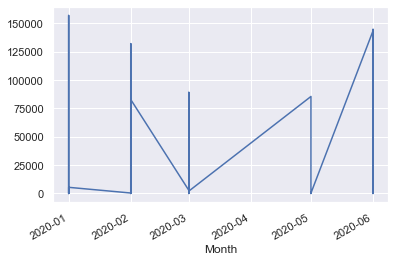

In [30]:
# also called as smoothing
moving_average_units=df_ND.Units.rolling(window=1).mean()  # window: This is the number of observations used for calculating the statistic. 

moving_average_units.plot() # weired again !!

### Modelling

##### Lets try with New Delhi first - checking if data is stationary or not

In [31]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df_ND.Units, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -10.035810810728766
2. P-Value :  1.5418158962054456e-17
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 161
5. Critical Values :
	 1% :  -3.471633386932248
	 5% :  -2.8796651107461972
	 10% :  -2.576433647235832


##### Splitting variables for fitting into SARIMAX model

In [32]:
# Variables
exog_data = df_ND.drop(['Units'],axis=1)
exog = sm.add_constant(exog_data)
endog = df_ND[[u'Units']]

print(endog)
exog.head()
# nobs = endog.shape[0]

              Units
Month              
2020-01-01    30.00
2020-01-01  1012.50
2020-01-01   300.00
2020-01-01    31.25
2020-01-01   401.25
...             ...
2020-06-01  6876.25
2020-06-01    16.25
2020-06-01    42.50
2020-06-01   410.00
2020-06-01  1405.00

[162 rows x 1 columns]


,City_Ahmedabad,City_Bengaluru,City_Bhopal,City_Bhubaneswar,City_Chandigarh,City_Chennai,City_Coimbatore,City_Gurgaon,City_Guwahati,City_Hyderabad,...,Brand_Poco,Brand_Samsung,Brand_Tecno,Brand_Xiaomi,Brand_YU,Brand_itel,Brand_realme,Brand_vivo,Channel_Offline,Channel_Online
Month,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2020-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2020-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [33]:
# Fit the model
sarimax = sm.tsa.statespace.SARIMAX(endog.astype(float), exog=exog.astype(float), order=(1,0,1))
fit_res = sarimax.fit(disp=False)
print(fit_res.summary())

C:\Users\adhama\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\adhama\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                  Units   No. Observations:                  162
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1810.113
Date:                Wed, 22 Sep 2021   AIC                           3708.225
Time:                        14:49:26   BIC                           3844.080
Sample:                             0   HQIC                          3763.384
                                - 162                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
City_Ahmedabad   -1.612e-12         -0        inf      0.000   -1.61e-12   -1.61e-12
City_Bengaluru    1.815e-12         -0       -inf      0.000    1.82e-12    1.82e-12
City_Bhopal      -8.386e-12 

C:\Users\adhama\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2937: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse


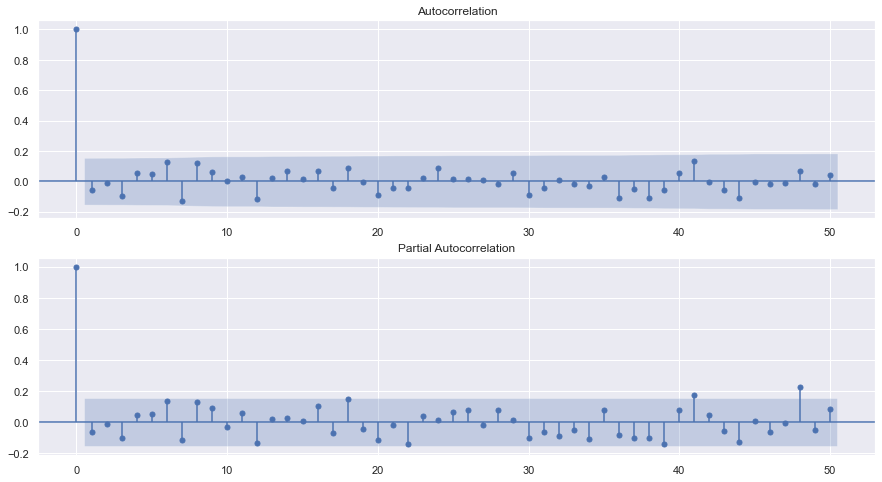

In [34]:
res = fit_res.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

In [48]:
#### Test the model >>> Error of duplicate axis

df_ND['forecast']=fit_res.predict(start=1,end=41,exog=exog.astype(float),dynamic=True)
#df_ND[['Units','forecast']].plot(figsize=(12,8))

ValueError: cannot reindex from a duplicate axis